In [1]:
# -*- coding: utf-8 -*-
# Author: Ang Ming Liang

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

import seaborn as sns

try:
    from arspy.ars import adaptive_rejection_sampling
except ModuleNotFoundError:
    %pip install -qq arspy
    from arspy.ars import adaptive_rejection_sampling

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [9]:
latexify(width_scale_factor=3, fig_height=1.5)

saving image to ./ars_demo1_latexified.pdf
Figure size: [1.96721311 1.5       ]


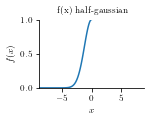

saving image to ./ars_demo2_latexified.pdf
Figure size: [1.96721311 1.5       ]


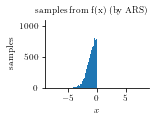

In [17]:
a, b = -2, 0
domain = [-float("inf"), 0]
n_samples = 20000
sigma = 3


def halfgaussian_logpdf(x):
    out = np.log(np.exp(-(x**2) / sigma)) * np.heaviside(-x, 1)
    return out


xs = np.arange(-3 * sigma, 0.01, 0.1)
y = np.exp(halfgaussian_logpdf(xs))

samples = adaptive_rejection_sampling(logpdf=halfgaussian_logpdf, a=a, b=b, domain=domain, n_samples=n_samples)

# Title
plt.title("f(x) half-gaussian")

# Fix the plot size
plt.xlim(-3 * sigma, 3 * sigma)
plt.ylim(0, 1)

plt.plot(xs, y)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
sns.despine()
savefig("ars_demo1")
plt.show()

# Title
plt.title("samples from f(x) (by ARS)", x=0.45)

# Fix the plot size
plt.xlim(-3 * sigma, 3 * sigma)
plt.ylim(0, 1100)

plt.hist(samples, bins=75)
plt.xlabel("$x$")
plt.ylabel("samples")
sns.despine()
savefig("ars_demo2")
plt.show()